In [378]:
from google.colab import drive
drive.mount('/content/drive')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#About Dataset

#Description:

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

Acknowledgements:
This dataset has been referred from Kaggle.

Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score

#Data Collection & Processing

In [380]:
# loading the data from sklearn
breast_cancer_data = pd.read_csv('/content/data.csv')

In [381]:
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [382]:
df=breast_cancer_data.copy()

In [383]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [384]:
df.shape

(569, 33)

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [386]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#EDA

In [387]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [388]:
df.drop(columns='Unnamed: 32', axis=1, inplace=True)
df.drop(columns='id', axis=1, inplace=True)

<Axes: >

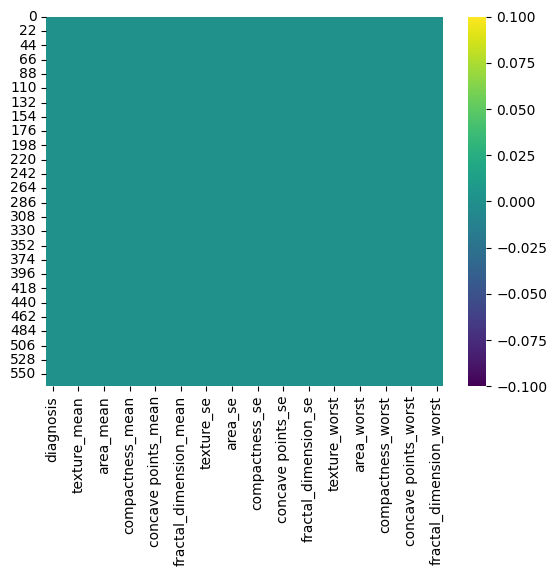

In [389]:
sns.heatmap(df.isnull(), cmap='viridis')

In [390]:
df.shape

(569, 31)

In [391]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [392]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

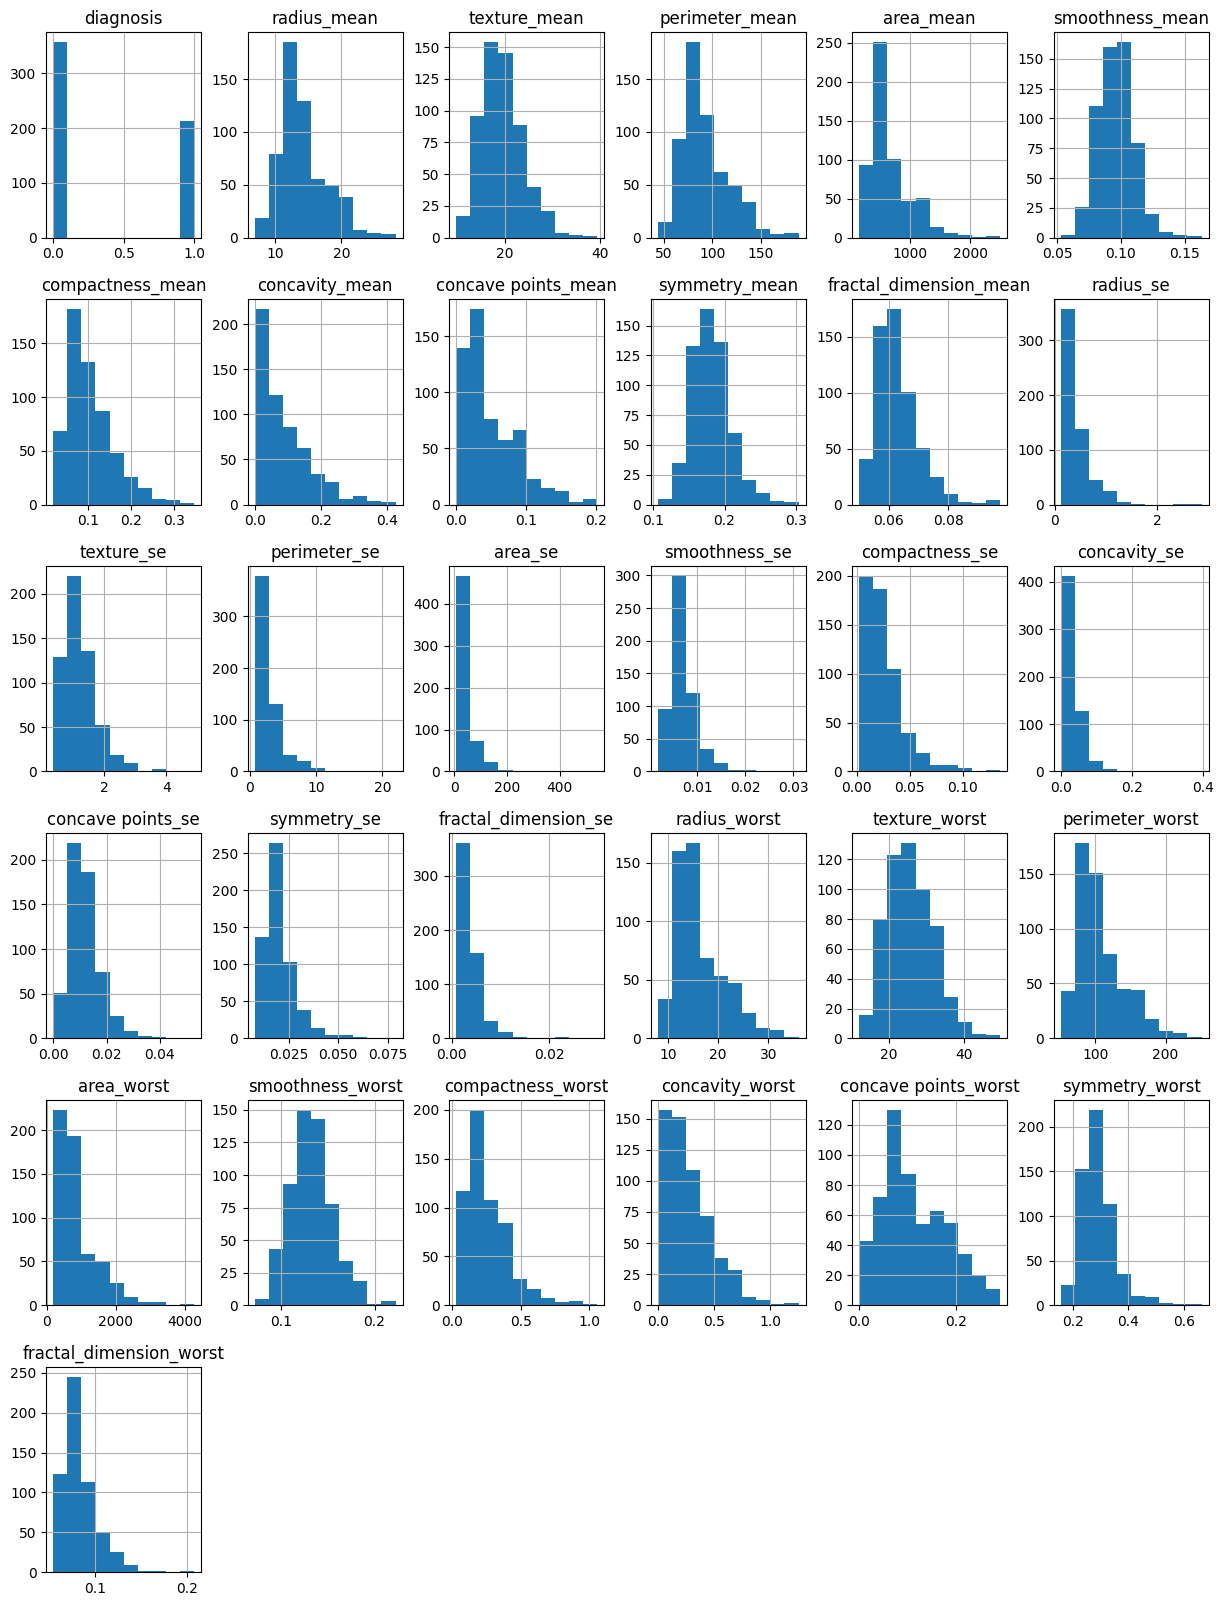

In [393]:
numerical_features = df.select_dtypes(include=['int', 'float'])
# Histograms for all numerical features
numerical_features.hist(bins=10, figsize=(15, 20))
plt.show()

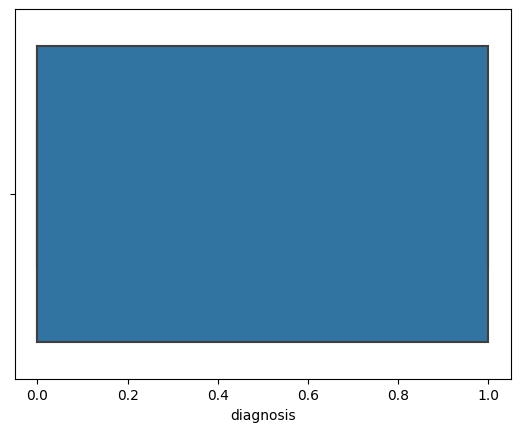

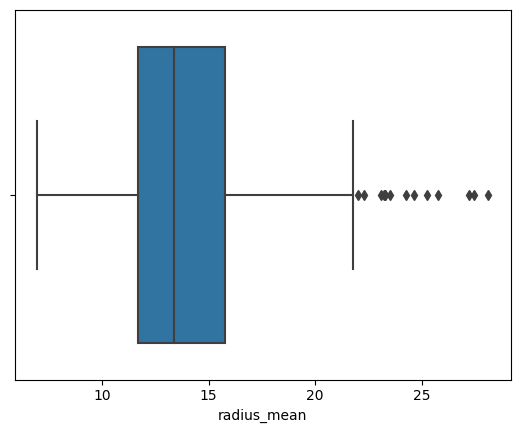

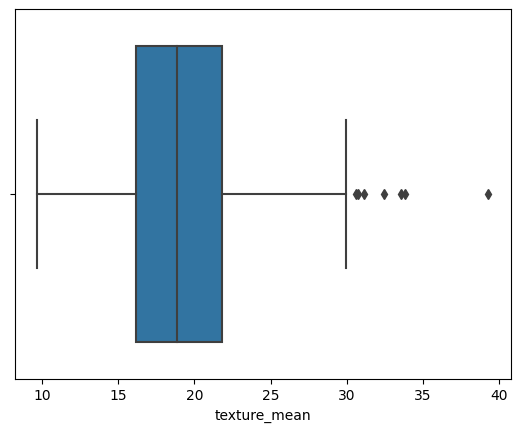

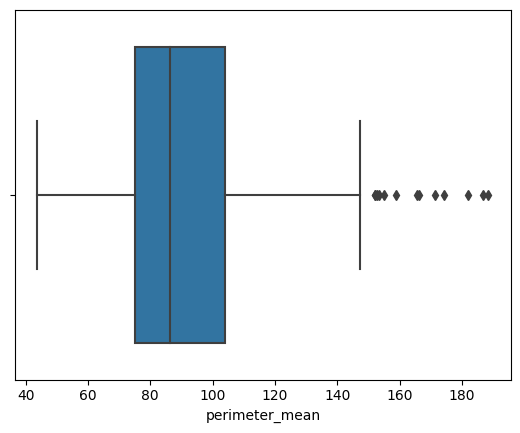

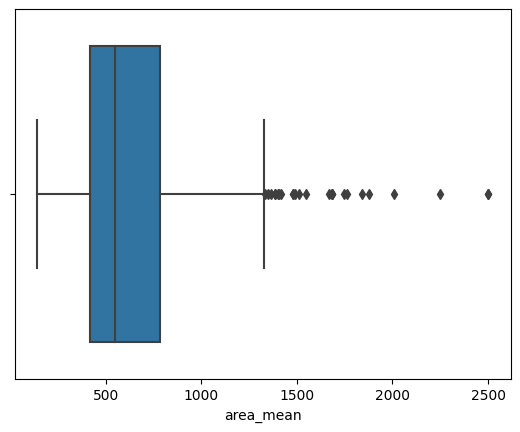

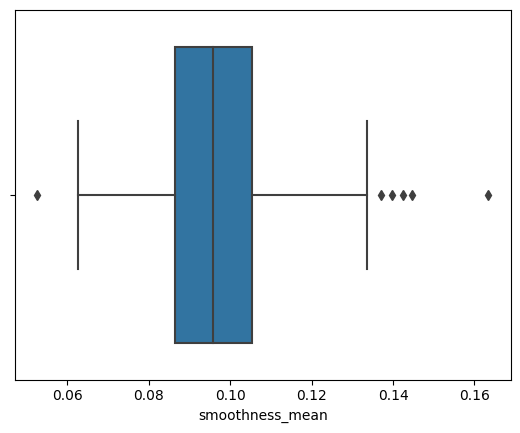

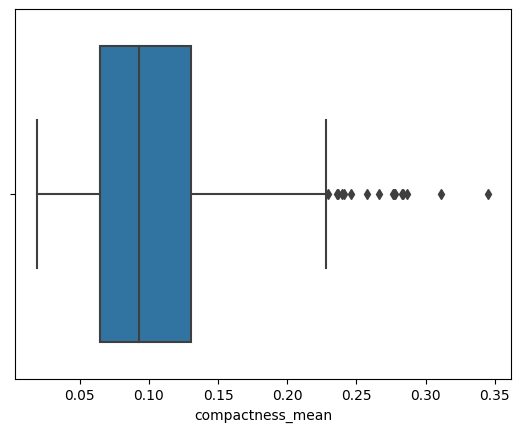

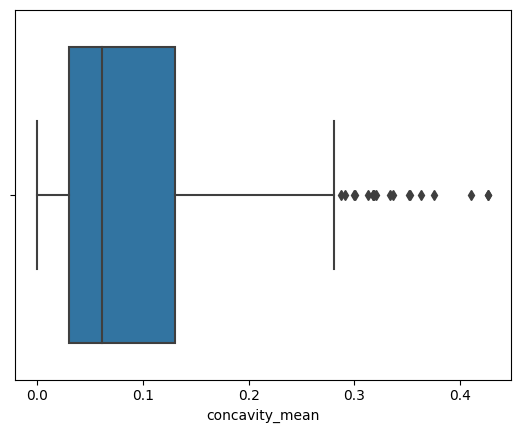

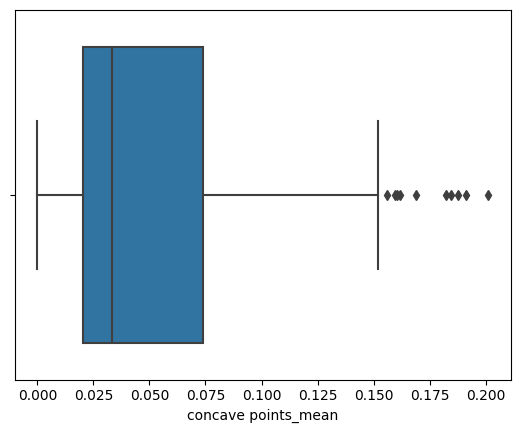

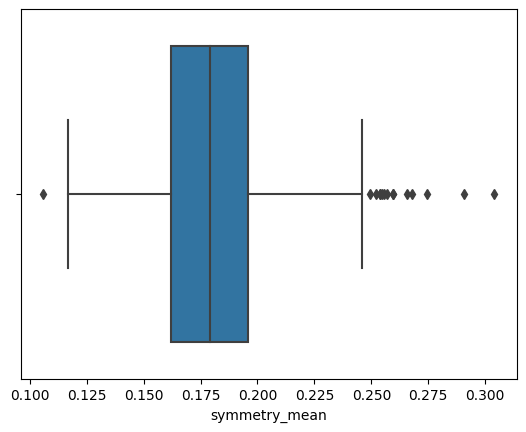

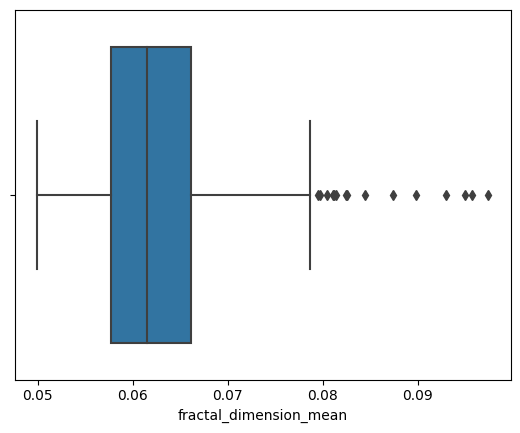

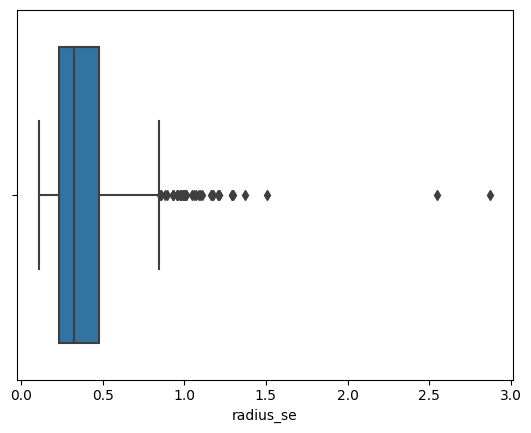

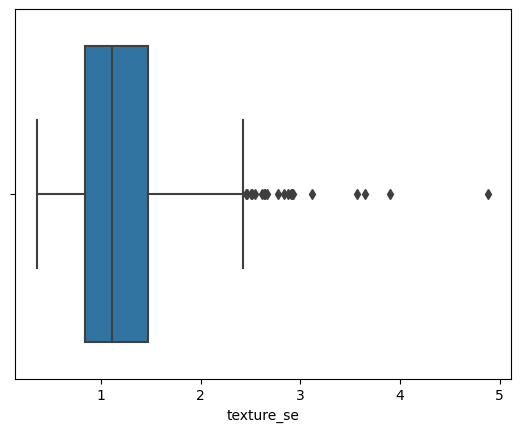

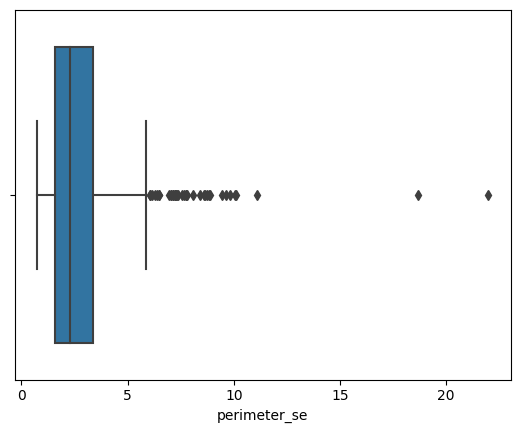

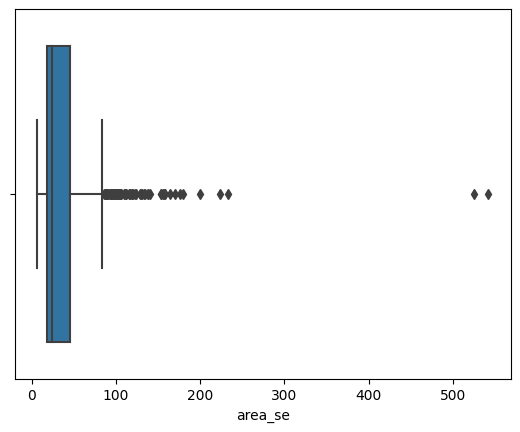

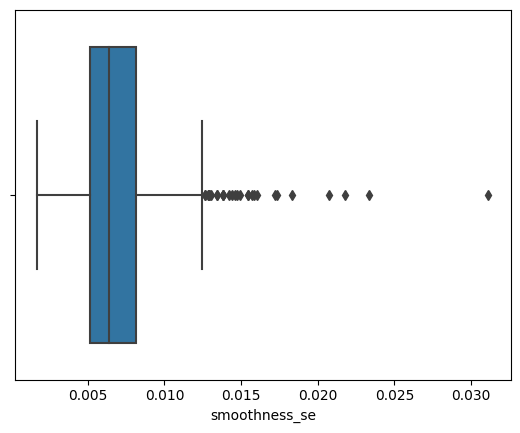

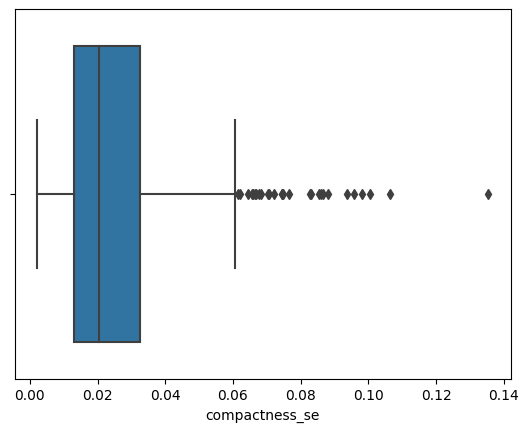

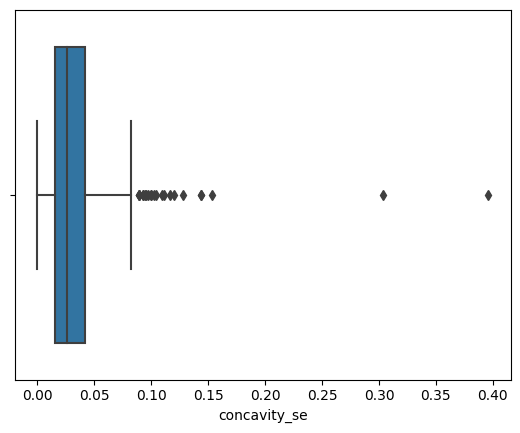

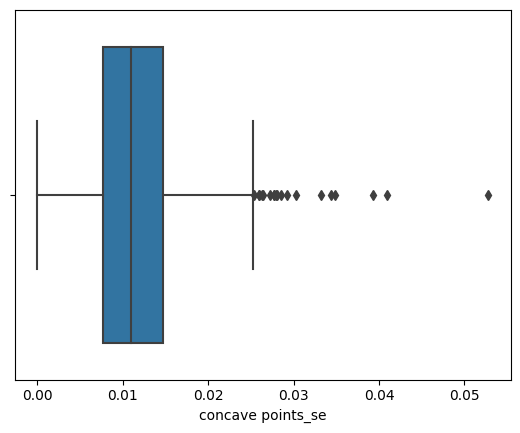

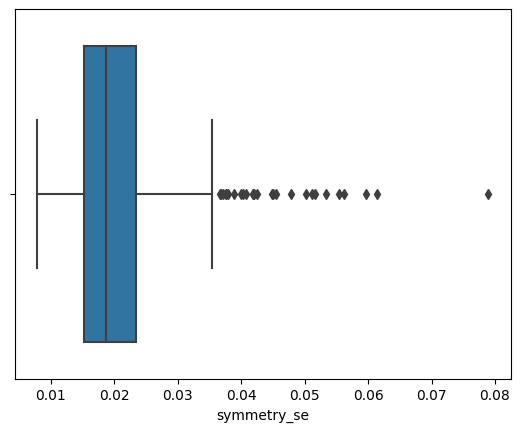

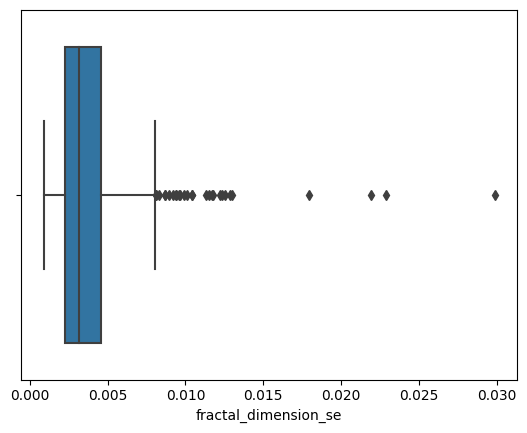

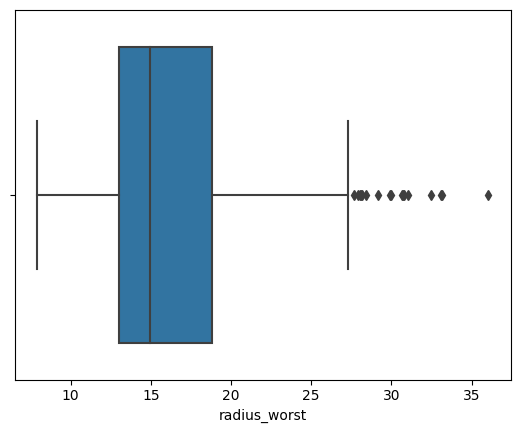

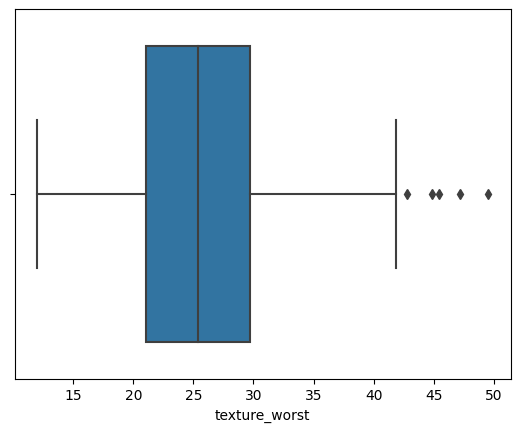

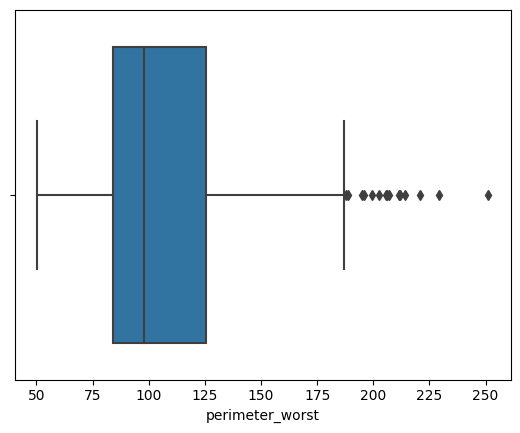

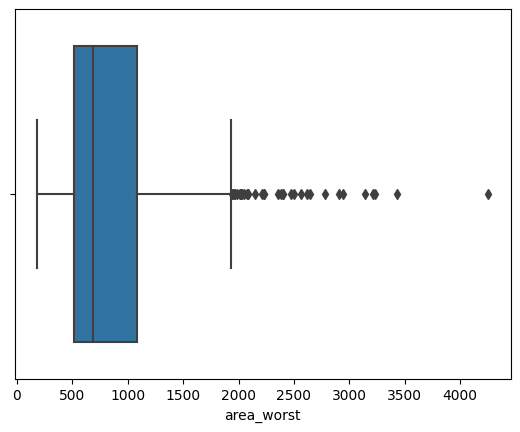

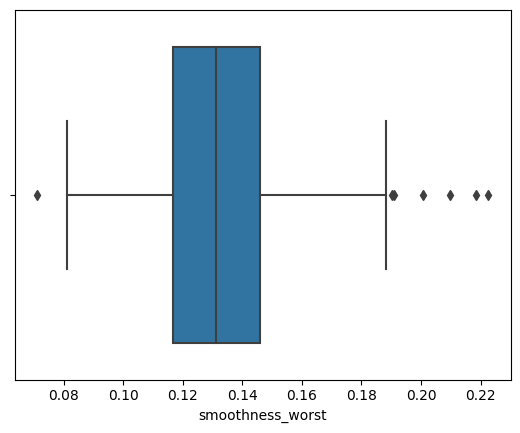

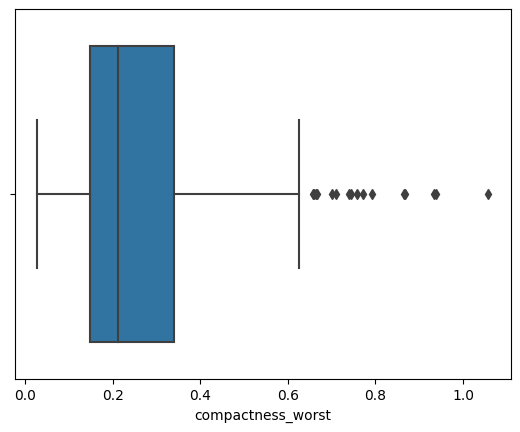

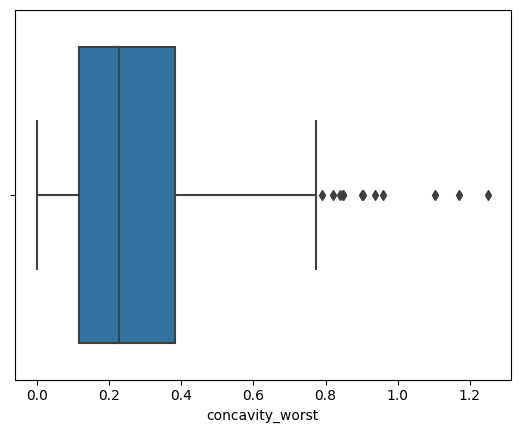

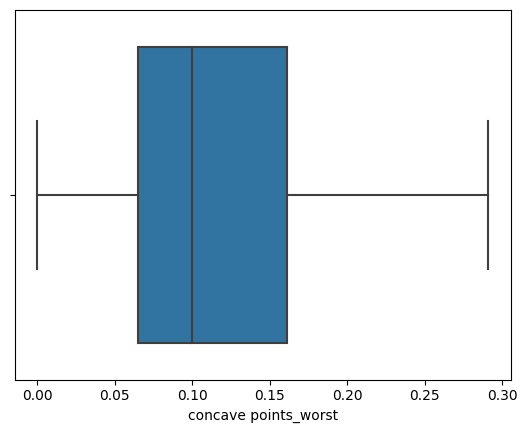

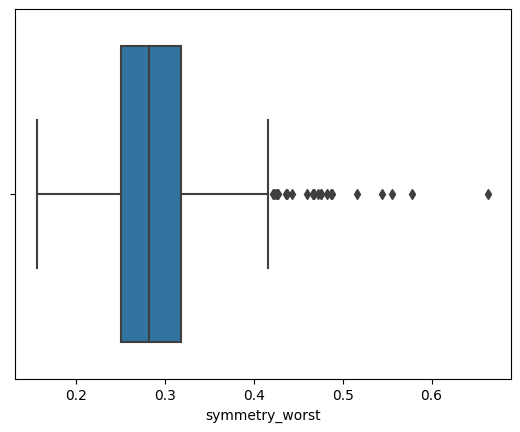

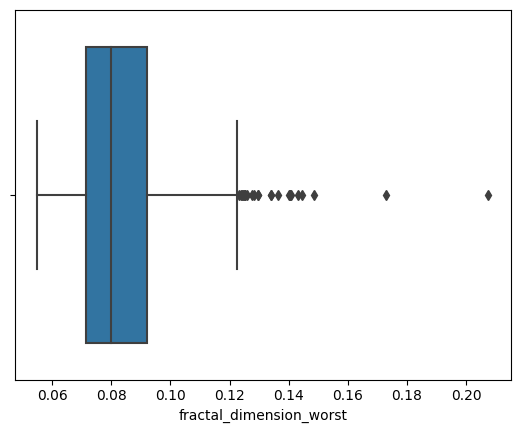

In [394]:
# Box plots for each numerical feature Outliers
for column in numerical_features.columns:
    sns.boxplot(x=column, data=numerical_features)
    plt.show()

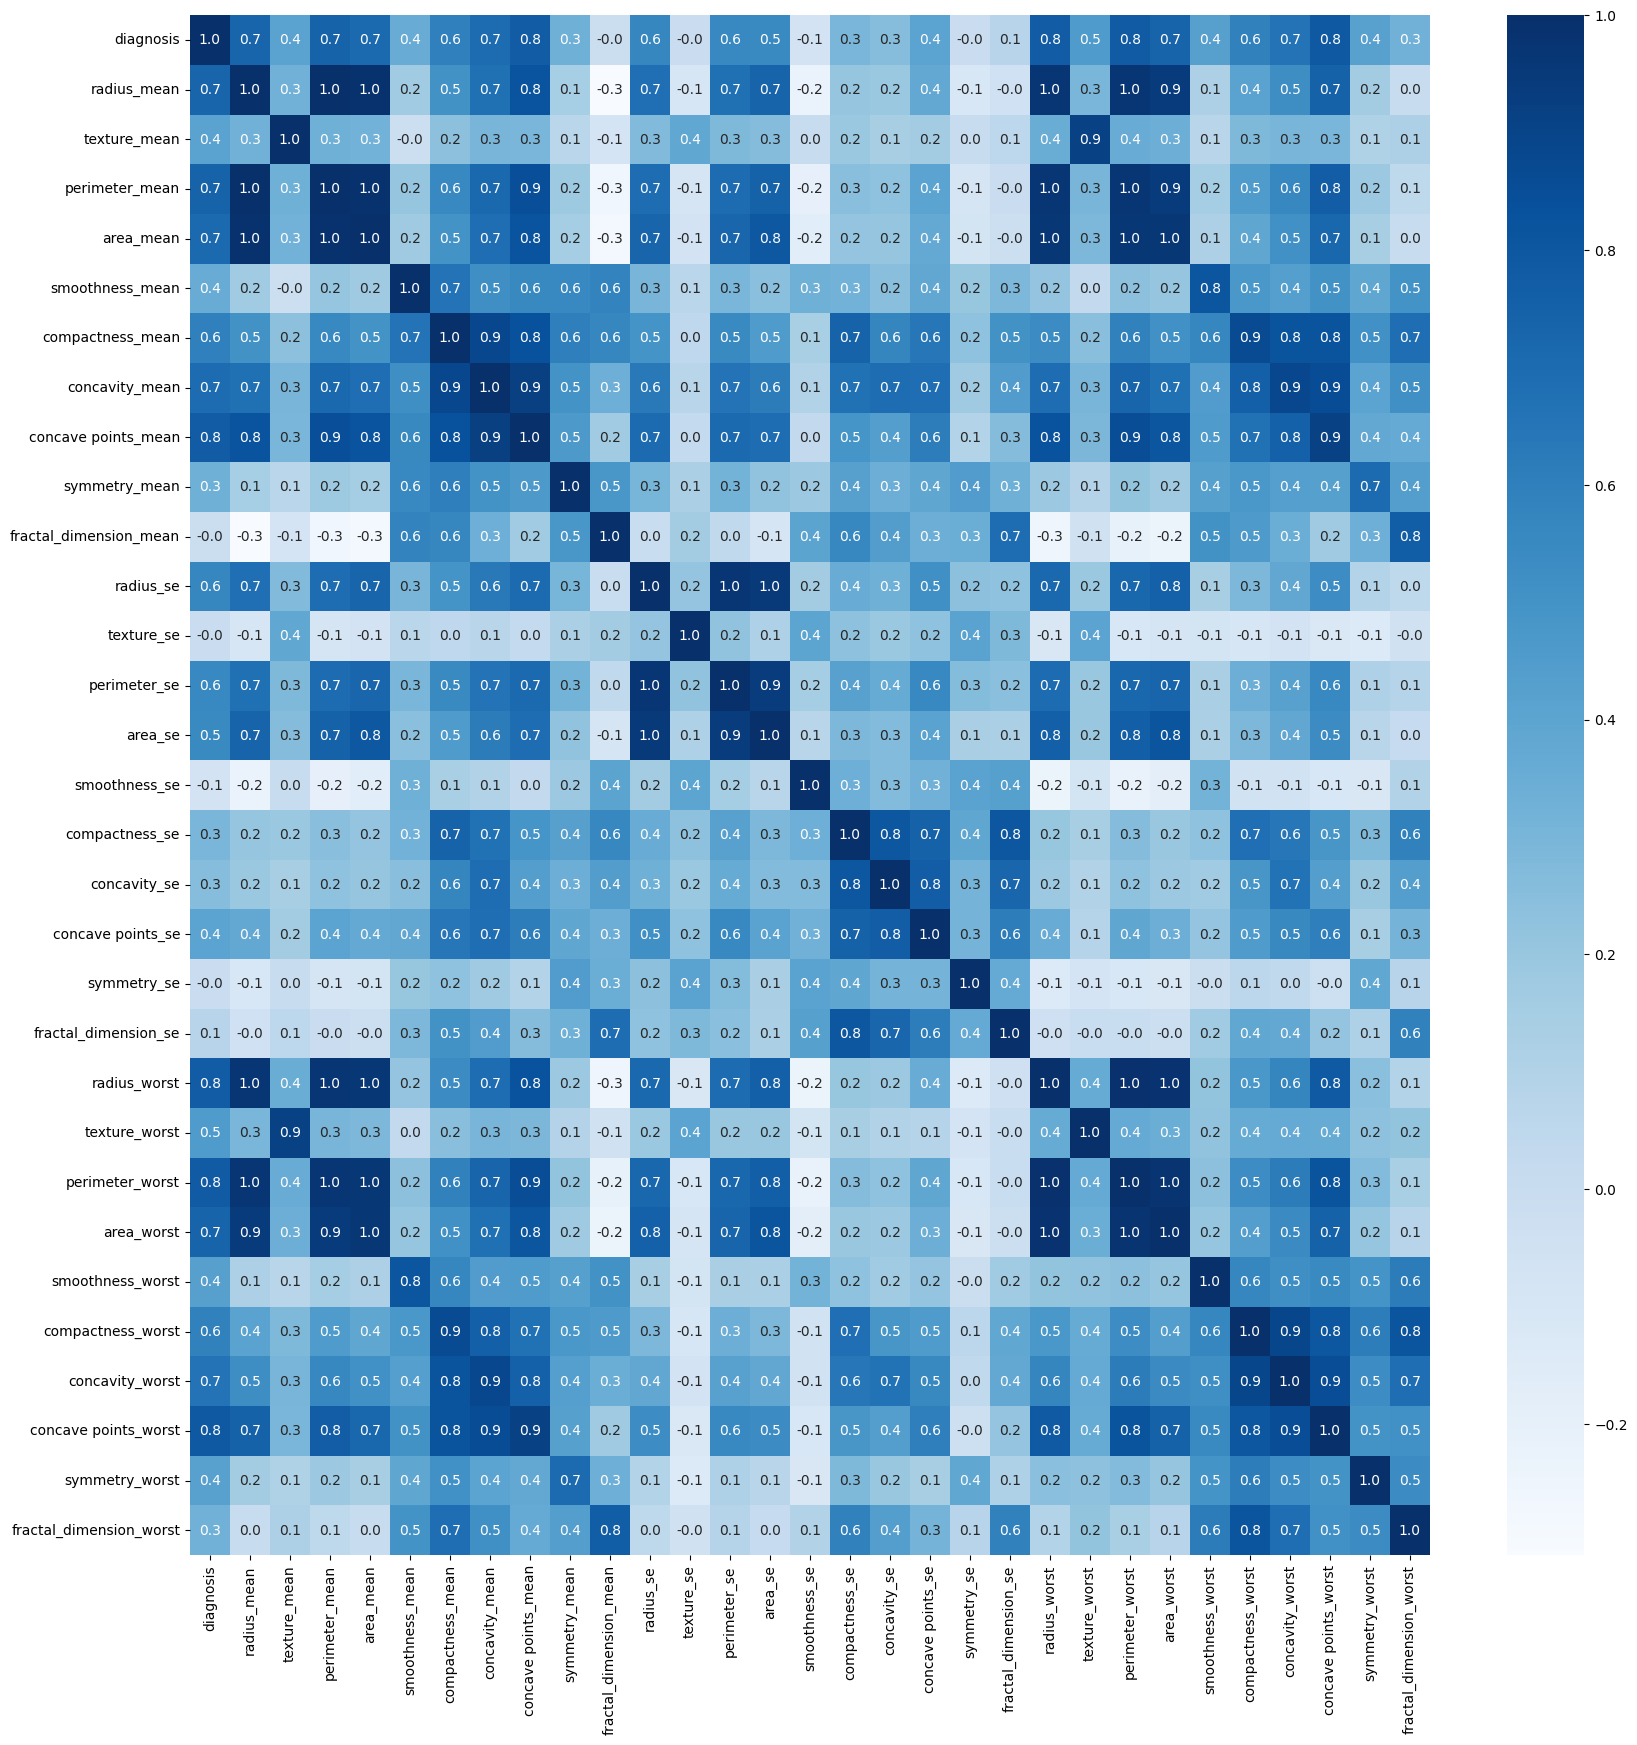

In [395]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')
plt.savefig('Correlation Heat map')

#Multicollinearity problem:

Multicollinearity exists when an independent variable is highly correlated with one or more independent variables

#Conclusion
No missing values were observed in the dataset, indicating that the data is complete.
The majority of the features are continuous numerical values, except for the target column.
The mean values for most features are slightly greater than the median, suggesting that the data is right-skewed.
A slight class imbalance is evident, with more instances of the "Benign" class (0) than the "Malignant" class (1).
Upon conducting a group-wise analysis, it became apparent that the mean values of most features are notably higher for Malignant cases compared to the Benign cases.
Outliers were detected in the dataset, which might need to be addressed during the data preprocessing phase.
The correlation matrix analysis revealed that many features are highly correlated, indicating potential multicollinearity issues. As a result, some features may need to be removed during the feature selection process.

#Model Using

In [396]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [397]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [398]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [399]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [400]:
#scaler=MinMaxScaler()
#scaler_X=scaler.fit_transform(X)
scaler = StandardScaler()
scaler_X = scaler.fit_transform(X)

In [401]:
scaler_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [402]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(scaler_X, y, test_size=0.20, random_state=42)

In [403]:
X_train.shape

(455, 30)

In [404]:
y_train.shape

(455,)

In [405]:
#LogisticRegression
param_grid_lr= {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [406]:
#DecisionTreeClassifier
param_grid_dtc = {'max_depth': [2, 4, 6, 8, 10]}

In [407]:
#RandomForestClassifier
param_grid_rfc = {'n_estimators': [100, 200, 300], 'max_depth': [2, 4, 6]}

In [408]:
#GradientBoostingClassifier
param_grid_gbc = {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01, 0.001]}

In [409]:
#SVC
param_grid_sv = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}

In [410]:
#KNeighborsClassifier
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

In [411]:
#GaussianNB
param_grid_gnb = {}

In [412]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
sv=SVC()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [413]:
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5)
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, cv=5)
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv=5)
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=5)
grid_search_sv = GridSearchCV(estimator=sv, param_grid=param_grid_sv, cv=5)
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)
grid_search_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid_gnb, cv=5)


In [414]:
for model in [grid_search_lr,grid_search_dtc,grid_search_rfc,grid_search_gbc,grid_search_sv,grid_search_knn,grid_search_gnb]:
  print('******************************************************',model)
  abc=model.fit(X_train,y_train)
  Y_pred_train=abc.predict(X_train)
  Y_pred_test=abc.predict(X_test)
  As_train=accuracy_score(Y_pred_train,y_train)
  As_test=accuracy_score(Y_pred_test,y_test)
  cm=confusion_matrix(Y_pred_test,y_test)
  cr=classification_report(Y_pred_test,y_test)




  print("training Accuracy score \n" ,As_train)
  print("=========="*3)
  print("testing Accuracy score \n" ,As_test)
  print("=========="*3)
  print("Confusion matrix \n" ,cm)
  print("=========="*3)
  print("CLASSIFICATION REPORT \n" ,cr)
  print("=========="*3)
  #print("ROC AUC \n" ,ROC)
  print("=========="*3)

****************************************************** GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

training Accuracy score 
 0.9846153846153847
testing Accuracy score 
 0.9912280701754386
Confusion matrix 
 [[71  1]
 [ 0 42]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

****************************************************** GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10]})
training Accuracy score 
 0.9978021978021978
testing Accuracy score 
 0.9473684210526315
Confusion matrix 
 [[68  3]
 [ 3 40]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0

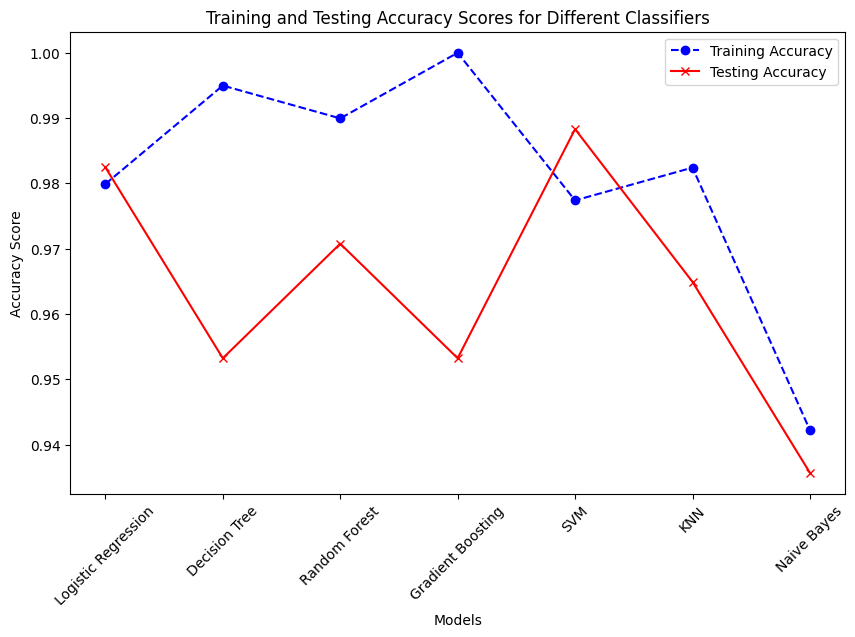

In [415]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Naive Bayes']
training_scores = [0.9798994974874372, 0.9949748743718593, 0.9899497487437185, 1.0, 0.9773869346733668, 0.9824120603015075, 0.9422110552763819]
testing_scores = [0.9824561403508771, 0.9532163742690059, 0.9707602339181286, 0.9532163742690059, 0.9883040935672515, 0.9649122807017544, 0.935672514619883]

plt.figure(figsize=(10, 6))
plt.plot(models, training_scores, marker='o', linestyle='--', color='b', label='Training Accuracy')
plt.plot(models, testing_scores, marker='x', linestyle='-', color='r', label='Testing Accuracy')
plt.title('Training and Testing Accuracy Scores for Different Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#Using Neural Network

In [416]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [417]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [418]:
#setting up the layers of neural network

In [419]:
# setting up the layers of Neural Network
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(128, input_shape=(30,), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [420]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [428]:
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 29ms/step - loss: 8.0244e-04 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9565
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 9.0788e-04 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9565
Epoch 3/100
13/13 [==============================] - 0s 24ms/step - loss: 5.7540e-04 - accuracy: 1.0000 - val_loss: 0.0382 - val_accuracy: 0.9783
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 1.8110e-04 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 0.9783
Epoch 5/100
13/13 [==============================] - 0s 15ms/step - loss: 1.8860e-04 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.9783
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9783
Epoch 7/100
13/13 [==============================] - 0s 15ms/step - loss: 2.3520e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val

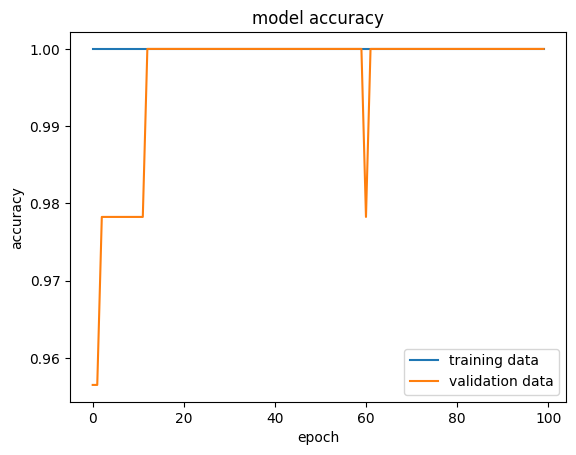

In [429]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

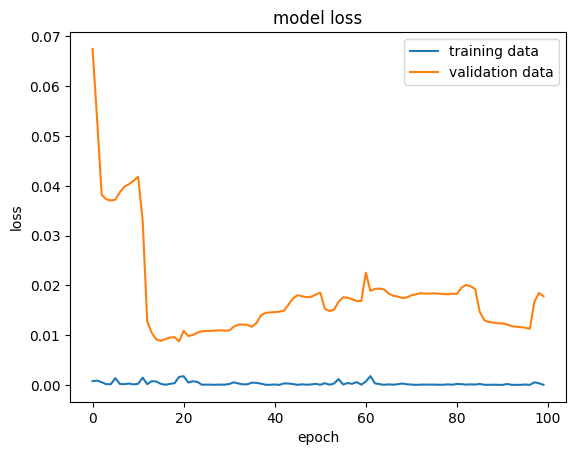

In [430]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [431]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.3216 - accuracy: 0.9649
0.9649122953414917


In [432]:
#  argmax function
my_list = [0.25, 0.56]
index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


#Conclusion:

Based on the provided training log, it appears that the model has been successfully trained. It achieves a perfect accuracy of 100% both on the training and validation datasets, and the loss continues to decrease during training, indicating that the model is learning effectively and not overfitting. However, it's important to remember that these results are based on the dataset used for training and validation. To fully assess the model's performance, you should evaluate it on a separate test dataset or in a real-world scenario.





